# Jesus Esteban Bustamante Apodaca 598557

La base de datos seleccionada proviene de la pagina Kaggle, donde se encuentran varias bases de datos. La base de datos seleccionada para este proyecto es la de "USA Housing Dataset" que contiene informacion sobre varias casas provenientes de Estados Unidos. La variable de interes en para este analisis es la variable "price" que seria el precio de las casas y como las demas variables influyen en el precio y asi hacer un analisis de inferencia.

<h4> 1. Importa los datos a tu ambiente de trabajo. Describe características de tu base de datos,
imprimiendo en consola y graficando información relevante. Por ejemplo: cantidad de
observaciones, cantidad de variables, tipo de variables, nombre de variables,
identificación de la respuesta de interés, etc. Asegúrate de que tus variables tengan un
nombre fácilmente interpretable. En caso contrario, adjunta también un diccionario, un
archivo .docx, .xlsx, .pdf, .csv, etc. donde se describa cada variable (por ejemplo: var1.
Peso medido en gramos, var2. Diámetro medido en centímetros). Explica claramente qué
de esta información te permitió suponer que realizar una regresión lineal pudiera ser una
buena solución y/o por qué supones que otro método sería una mejor opción. </h4>

Los datos de este datasheet contiene informacion de que puede servir para teorizar el efecto de las variables que tiene sobre el precio de las viviendas que se ubican en Estados Unidos, variables como el tamaño de la casa y el sotano, la cantidad de cuartos y baños, entre otras pueden tener una fuerte relacion a como varia el precio de las viviendas. Una regresion lineal considero personalmente que puede ser una buena opcion pero quedaria ver como es que se comportan los datos y la correlacion de ellos con la variable del precio para determinar que es mejor.

Primeras filas: 
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-09 00:00:00   376000.0       3.0       2.00         1340      1384   
1  2014-05-09 00:00:00   800000.0       4.0       3.25         3540    159430   
2  2014-05-09 00:00:00  2238888.0       5.0       6.50         7270    130017   
3  2014-05-09 00:00:00   324000.0       3.0       2.25          998       904   
4  2014-05-10 00:00:00   549900.0       5.0       2.75         3060      7015   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     3.0           0     0          3        1340              0      2008   
1     2.0           0     0          3        3540              0      2007   
2     2.0           0     0          3        6420            850      2010   
3     2.0           0     0          3         798            200      2007   
4     1.0           0     0          5        1600           1460      1979   

   yr_renovated      

Text(0.5, 1.0, 'Distribución de precios de viviendas')

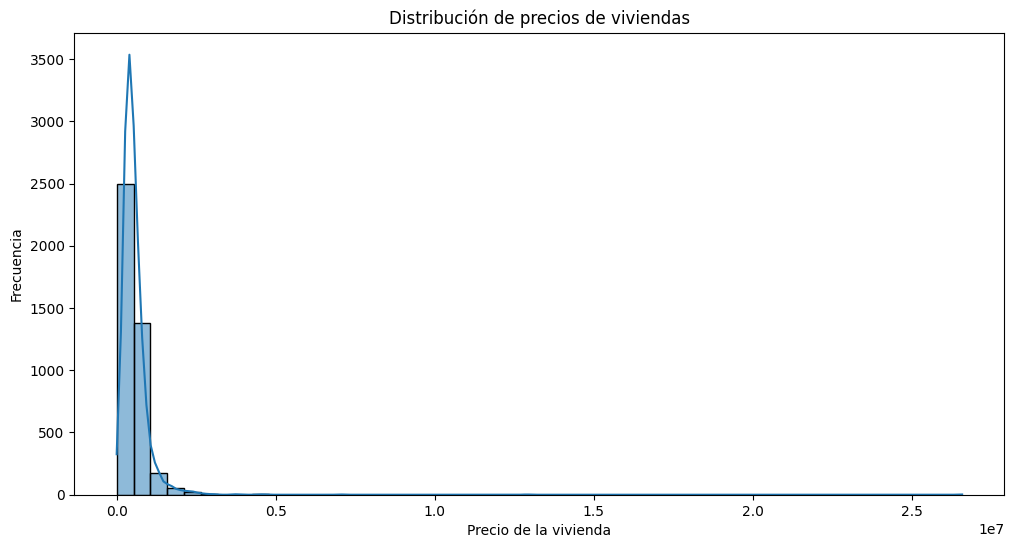

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("USA Housing Dataset.csv")
#Primeras filas del Datasheet
print("Primeras filas: ")
print(df.head())
#Tipos de variables
print("Tipos de variables: ")
print(df.dtypes)
#Estadisticas descriptivas de las variables
print("Resumen: ")
print(df.describe())
#Dimensiones de las columnas y filas
print("Dimensiones del datasheet: ", df.shape)
print("Valores nulos por columna", df.isnull().sum())

#Histograma de Precio como variable de interes
plt.figure(figsize=(12,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.xlabel("Precio de la vivienda")
plt.ylabel("Frecuencia")
plt.title("Distribución de precios de viviendas")

<h4>2 .Aplica soluciones para al menos tres de los cinco problemas típicos que se describieron
en la presentación C1.5. Demuestra las modificaciones que se le realizaron a la base de
datos, imprimiendo en consola información relevante, y explica por qué se realizaron. Por
ejemplo: para el caso de variables cualitativas, podrías imprimir la cantidad y los nombres
de las variables antes de aplicar la solución, y la cantidad y los nombres de las variables
después de aplicar la solución.</h4>

Las variables cualitatvias como date, street, city, statezip, y country son poco relevantes para predecir el precio de una casa, especialmente Country, que esa variable es siempre la misma pues todos los datos son exclusivamente para Estados Unidos por lo que es irelevante al ser siempre el mismo resultado, aunque la calle y ciudad pueda que tengan relevancia, pero no proporcionan informacion util para poder predecir el precio aparte de poder generar problemas con el modelo al ser demasiadas categoricas. La variable de precio tiene una cantidad de outliers que pueden afectar negativamente al modelo al afectar la correlacion que tiene sobre las variables. Se elimino la variable yr_renovated, pues este no solo tenia huecos ya que no todas las casas estan renovadas sino tambien la correlacion era negativa por lo que mantener esta variable era completamente innecesaria.

Primeras filas
<bound method NDFrame.head of              price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     3.760000e+05       3.0       2.00         1340      1384     3.0   
1     8.000000e+05       4.0       3.25         3540    159430     2.0   
2     2.238888e+06       5.0       6.50         7270    130017     2.0   
3     3.240000e+05       3.0       2.25          998       904     2.0   
4     5.499000e+05       5.0       2.75         3060      7015     1.0   
...            ...       ...        ...          ...       ...     ...   
4135  3.081667e+05       3.0       1.75         1510      6360     1.0   
4136  5.343333e+05       3.0       2.50         1460      7573     2.0   
4137  4.169042e+05       3.0       2.50         3010      7014     2.0   
4138  2.034000e+05       4.0       2.00         2090      6630     1.0   
4139  2.206000e+05       3.0       2.50         1490      8102     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_b

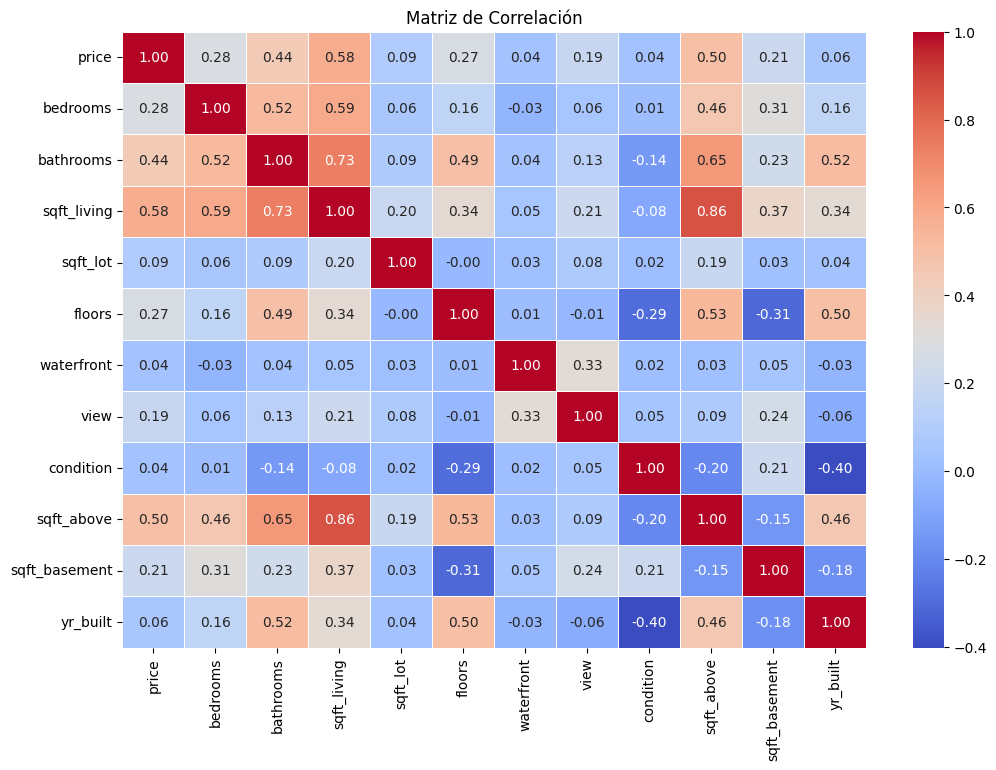

In [64]:
#Eliminacion de variables cualitativas que no tienen realmente ninguna relevancia
df = df.drop(columns=['date', 'street', 'city', 'statezip', 'country', 'yr_renovated'])
#yr_renovated es cuantitativo pero tiene demasiados ceros como para mantenerlo.
print("Primeras filas")
print(df.head)
print(df.describe)

# Calcular IQR
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#Filtrar los datos de la variable de interes 
df = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]
# Imprimir la cantidad de datos después de eliminar outliers
print(f"Cantidad de datos después de eliminar outliers: {df.shape[0]}")

#Grafica de Correlacion de las variables con el precio
correlacion_matriz = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlacion_matriz, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

<h4>3. Realiza un proceso de selección de características. Puedes llevar a cabo una
metodología de selección hacia adelante o eliminación hacia atrás, o incluso mezclarlas.
También puedes utilizar un método de regularización. Evidencia tus resultados
imprimiendo en consola la cantidad y los nombres de las variables antes y después del
proceso de selección de características. Explica claramente por qué utilizaste la
metodología empleada, así como alguna conclusión sobre los resultados de este proceso. </h4>

La metodologia para la seleccion de caracteristicas para este modelo es el metodo de eliminacion hacia atras, como anteriormente se elimino variables menos relevantes se puede considerar mejor usar este metodo ya que estas variables no afectaran negativamente al modelo, e ir usando las variables y eliminando las que tiene menos impacto podria ser en mi opinion una mejor solucion. Ya con los resultados anteriores donde se eliminaron las variables que afectaban negativamente el modelo, tambien se pudo ver cuales si tenian relevancia, por lo que hacer una seleccion hacia adelante no seria necesario para descubrir cuales son relevantes.

In [65]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split

#(X) como las variables relevantes, (y) como la variable de interes
X = df.drop(columns="price")
y = df["price"]
print("Variables antes:", list(X.columns))

#Separar el conjunto de entrenamiento y prueba
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Eliminacion hacia atras para la seleccion de caracteristicas
modelo = LinearRegression()
sfs = SFS(modelo, 
          k_features="best", #Numero optimo de variables
          forward="False", #Eliminacion hacia atras
          floating = False, 
          scoring="r2", #Optimizado en base R cuadrada
          cv=5) #Validacion cruzada en 5 folds
sfs.fit(X_train,y_train)

#Variables seleccionadas 
variables_seleccionadas = list(sfs.k_feature_names_)
X_seleccionadas = X[variables_seleccionadas]

print("Variables Seleccionadas por seleccion hacias atras", variables_seleccionadas)

Variables antes: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built']
Variables Seleccionadas por seleccion hacias atras ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'yr_built']


<h4>4. Genera un modelo de regresión lineal y al menos uno no lineal, para predecir una variable
de interés; explica con detalle por qué seguiste los pasos mostrados en tu código para
generar el modelo, en aras de obtener la mejor predicción y resultados generalizables.
Imprime en consola los coeficientes estimados al entrenar el modelo, e indica para cuáles
de ellos puedes afirmar que existe una asociación significativa con la respuesta, y el por
qué de tu aseveración.</h4>

In [66]:
from sklearn.metrics import mean_squared_error, r2_score
#Modelo de Regresion Lineal
X_train_seleccionadas = X_train[variables_seleccionadas]
X_test_seleccionadas = X_test[variables_seleccionadas]

regresion_linear = LinearRegression()
regresion_linear.fit(X_train_seleccionadas,y_train)
y_prediccion_lineal = regresion_linear.predict(X_test_seleccionadas)
#Coeficientes
coeficientes_linear = pd.DataFrame({'Variable': variables_seleccionadas, 'Coeficiente':regresion_linear.coef_ })
print("Coeficientes de la regresion Linear:")
print(coeficientes_linear)
#Evaluacion del modelo Linear
r2_linear = r2_score(y_test, y_prediccion_lineal)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_prediccion_lineal))
print(f"R cuadrada del modelo de Regresion Linear: {r2_linear:.4f}")
print(f"MSE del modelo de Regresion Linear: {rmse_linear:.4f}")


Coeficientes de la regresion Linear:
      Variable   Coeficiente
0     bedrooms -28354.321741
1    bathrooms  38083.412769
2  sqft_living    159.730044
3       floors  68274.505786
4    condition  17933.468912
5     yr_built  -1846.254623
R cuadrada del modelo de Regresion Linear: 0.3718
MSE del modelo de Regresion Linear: 176340.8901


In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
#Modelo no Linear: Regresion Polinomial
poly = PolynomialFeatures(2)
regresion_polinomial = make_pipeline(poly, LinearRegression()) #Creacion del modelo de regresion polinomial
regresion_polinomial.fit(X_train_seleccionadas, y_train) #Entrenamiento del modelo
y_prediccion_polinomial = regresion_polinomial.predict(X_test_seleccionadas)
#Coeficientes
nombres_variables = poly.get_feature_names_out(variables_seleccionadas)
coeficientes_polinomial = pd.DataFrame({'Variable': nombres_variables, 'Coeficiente':regresion_polinomial.named_steps['linearregression'].coef_})# Extraer la regresión lineal dentro del pipeline
print("Coeficientes de la Regresion Polinomial:")
print(coeficientes_polinomial)
#Evaluacion del modelo polinomial
r2_polinomial = regresion_polinomial.score(X_test_seleccionadas, y_test)
rmse_polinomial = np.sqrt(mean_squared_error(y_test,y_prediccion_polinomial))
print(f"R cuadrada del modelo de Regresion Polinomial (grado 2): {r2_polinomial:.4f}")
print(f"RMSE del modelo de Regresion Polinomial: {rmse_polinomial:.4f}")

Coeficientes de la Regresion Polinomial:
                 Variable   Coeficiente
0                       1  1.327669e-03
1                bedrooms  1.554132e+06
2               bathrooms  6.853029e+05
3             sqft_living -1.641910e+03
4                  floors -7.799248e+05
5               condition  6.051495e+05
6                yr_built -4.693740e+04
7              bedrooms^2 -7.719782e+03
8      bedrooms bathrooms  2.603195e+04
9    bedrooms sqft_living  7.937741e+00
10        bedrooms floors -8.800934e+03
11     bedrooms condition -5.316347e+03
12      bedrooms yr_built -8.007981e+02
13            bathrooms^2 -1.273604e+04
14  bathrooms sqft_living -1.971842e+01
15       bathrooms floors  1.157637e+04
16    bathrooms condition  1.896335e+03
17     bathrooms yr_built -3.384449e+02
18          sqft_living^2 -1.824738e-02
19     sqft_living floors -1.953588e+00
20  sqft_living condition -4.306617e+00
21   sqft_living yr_built  9.811370e-01
22               floors^2  1.525706e+04

Despues de ver los resultados de ambos modelos de Regresion Lineal y el de Regresion No Linear: Regresion Polinomial, el resultado dio que la R cuadrada en la Polinomial es mayor con 0.4273 sobre los 0.3718 del Linear, lo que indica que en el modelo polinomial hay una mayor variabilidad del precio por un 5% sobre el Linear. en el caso del RMSE, este es menor al Linear, con 168k en el polinomial a comparacion de los 176k del Linear aunque la diferencia del RMSE no es tan grande se puede ver que si hay una diferencia aun. Los coeficientes de la regresion linear se puede interpretar claramente, en cambio la regresion Polinomial tiene relacionas mas complejas y dificiles de interpretar, por ejemplo, el cambio de signo en variables como "floors" puede indicar que la relacion no es puramente lineal segun los resultados obtenidos de ese modelo.

<h4>5. Calcula al menos una métrica de error y una del nivel de linealidad del modelo, con la
intención de que ambas métricas representen el funcionamiento esperado del modelo
para cualquier dato que se le presente. Agrega un comentario que describa en palabras
sencillas el significado de los mismos.</h4>

In [68]:
#R cuardrada y RMSE(Raiz del Error Cuadratico Medio)
r2_linear = r2_score(y_test, y_prediccion_lineal)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_prediccion_lineal))
print(f"R cuadrada del modelo de Regresion Linear: {r2_linear:.4f}")
print(f"RMSE del modelo de Regresion Linear: {rmse_linear:.4f}")


r2_polinomial = regresion_polinomial.score(X_test_seleccionadas, y_test)
rmse_polinomial = np.sqrt(mean_squared_error(y_test,y_prediccion_polinomial))
print(f"R cuadrada del modelo de Regresion Polinomial (grado 2): {r2_polinomial:.4f}")
print(f"RMSE del modelo de Regresion Polinomial: {rmse_polinomial:.4f}")

R cuadrada del modelo de Regresion Linear: 0.3718
RMSE del modelo de Regresion Linear: 176340.8901
R cuadrada del modelo de Regresion Polinomial (grado 2): 0.4273
RMSE del modelo de Regresion Polinomial: 168373.3204


La R2, captura la variabilidad de la variable "precio" en este caso, como se puede ver la R cuadrada de la regresion Polinomial es mayor al lineal, pero aun asi un 42.73% de variabilidad, por lo que da a entender que ambos modelos no explican bien la variabilidad de los datosy no es tan buen predicador.
La RMSE, que se usa pues coincide mejor con las unidades de la variable ojetivo, indica que en el polinomial tiene mejor resultado sobre el linear ya que mas bajo con 168k a comparacion del 173k, pero este resultado es alto lo cual indica que tiene dificultades para predecir con precision.

<h4> 6. Genera un modelo de regresión lineal o no lineal (del mismo tipo que el que haya obtenido
el mejor desempeño en los puntos anteriores), pero para realizar un análisis de inferencia.
A partir del mismo, realiza una o varias inferencias sobre los datos, asegurándote de
incluir márgenes de error para tus conclusiones. </h4>

In [ ]:
import statsmodels.api as sm
#Debido a que el modelo de regresion Polinomial tuvo mejor desempeño se usara el mismo
X_train_poly = poly.fit_transform(X_train_seleccionadas)
modelo_polinomial = sm.OLS(y_train, X_train_poly).fit()

#Coeficientes con intervalos de confianza
Coeficientes = modelo_polinomial.params
intervalos_confianza = modelo_polinomial.conf_int(alpha=0.05) #95 de confianza

coef_df = pd.DataFrame({
    'Variable': poly.get_feature_names_out(variables_seleccionadas),
    'Coeficientes': Coeficientes,
    "IC_Lower": intervalos_confianza[0],
    "IC_Upper": intervalos_confianza[1]
})
#filtrar coeficientes con intervalos que no contienen el 0
coef_significativos = coef_df[(coef_df['IC_Lower'] > 0) | (coef_df['IC_Upper'] < 0)]
print(coef_significativos)

                 Variable  Coeficientes       IC_Lower      IC_Upper
x1               bedrooms  1.697303e+06  989020.526899  2.405585e+06
x3            sqft_living -1.681047e+03   -2817.421713 -5.446726e+02
x5              condition  1.061856e+06  294422.570438  1.829289e+06
x7             bedrooms^2 -7.534252e+03  -14665.200856 -4.033023e+02
x8     bedrooms bathrooms  2.694335e+04    8800.719950  4.508597e+04
x12     bedrooms yr_built -8.763540e+02   -1231.669663 -5.210384e+02
x18         sqft_living^2 -1.834032e-02      -0.030756 -5.924667e-03
x21  sqft_living yr_built  9.976463e-01       0.429874  1.565419e+00
x23      floors condition  3.188993e+04    5821.026008  5.795884e+04
x26    condition yr_built -5.325583e+02    -916.143455 -1.489732e+02


<h4>"Bedrooms":</h4>

Tiene un coeficiente de 1.6978e+06, lo que indica que al aumentar el numero de habitaciones, el precio de la casa aumenta en respuesta, como su intervalo de confianza no es de 0 y es positiva se puede afirmar que la relacion es significativa.

<h4>"sqrt_living":</h4>

Tiene un coeficiente de -1.681e+06, por lo que al aumentar el tamaño de la vivienda el precio disminuye segun los resultados de este modelo, con un los intervalos de confianza que estan bajo cero hay evidencia de la relacion negativa con el precio.

<h4>"condition":</h4>

Con un coeficiente de 1.0618e+06 lo que indica que al aumentar la condicion de la vivienda el precio de la misma aumentara, el intervalo de confianza es de 294422 a 1.83e+06 lo que afirma que su relacion si es significativa con la variable "precio".
